# 모듈3 코드실습2

In [100]:
from numpy import *
from numpy import array
import operator
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

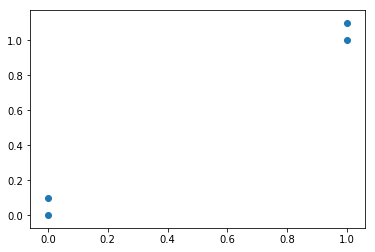

In [8]:
# kNN

def createDataSet() : 
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]]) # trainingSet
    labels = ['A', 'A', 'B', 'B'] # labels
    return group, labels

group,labels = createDataSet()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(group[:, 0], group[:, 1])
plt.show()

# 4개의 데이터셋을 불러온다.

In [30]:
# kNN 분류 알고리즘 실행
# AttributeError 발생하는데 이걸 해결해보자

# classify0 함수 : 유클리드 거리 구하는 공식을 이용함

def classify0(inX, dataSet, labels, k) :
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet # 각 값들의 차이를 구하고
    sqDiffMat = diffMat**2 # 거기에 제곱을 씌우고
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5 # 값에 루트를 씌워준다 : 유클리드 거리
    sortedDistIndicies = distances.argsort()
    classCount = {}
    
    for i in range(k) : 
        votelabel = labels[sortedDistIndicies[i]]
        classCount[votelabel] = classCount.get(votelabel, 0) + 1

    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

classify0([0, 0], group, labels, 3)

'B'

자료실 (https://www.dropbox.com/sh/qes64mgegqxyczx/AABaC3pA6oN8PirzxyprjqGpa?dl=0)

여기서 datingTestSet 을 받아줌

txt 파일 까보면


40920	8.326976	0.953952	largeDoses

14488	7.153469	1.673904	smallDoses

26052	1.441871	0.805124	didntLike

75136	13.147394	0.428964	didntLike


이런식으로 되어있음

이 파일을 이용해서 데이트 사이트의 만남 주선을 개선하기

In [31]:
def file2matrix(filename) : 
    love_dictionary = {'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    arrayOfLines = fr.readlines()
    numberOfLines = len(arrayOfLines)
    returnMat = zeros((numberOfLines, 3)) # 실제 dataSet 사이즈만큼 영벡터 생성
    classLabelVector = [] # 리스트 타입으로 반환
    index = 0
    
    for line in arrayOfLines :
        line = line.strip()
        listFromLine = line.split('\t') # 양끝 탭 공백 없앰
        returnMat[index, :] = listFromLine[0:3]
        # classLabelVector.append(listFromLine[-1])
        if (listFromLine[-1].isdigit()) :
            # 해당 부분 코드는 협업을 위한 코드 유연성 문제로 이렇게 코드를 친것
            classLabelVector.append(int(listFromLine[-1]))
        else :
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index+=1
        
    return returnMat, classLabelVector

datingDataMat, datingLabels = file2matrix('C:/Users/Affinity/Desktop/개인자료/module3/datingTestSet.txt')
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [32]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

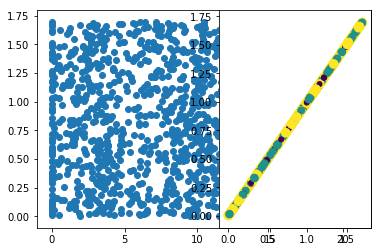

In [38]:
# 시각화

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2])
ax1 = fig.add_subplot(122)
ax1.scatter(datingDataMat[:, -1], datingDataMat[:, 2],
           25.0*array(datingLabels), 25.0*array(datingLabels))
# 각 array에 15.0, 25.0 상수를 곱해주는거는 각 데이터의 크기가 너무 작아서 그럼
plt.show()

In [39]:
# 수치형 데이터 정규화

def autoNorm(dataSet) : 
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet)) # newValue 들이 들어갈 영행렬
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1) # oldValue - min
    normDataSet = normDataSet / tile(ranges, (m,1)) # max - min으로 나눠줌
    return normDataSet, ranges, minVals

normMat, ranges, minVals = autoNorm(datingDataMat)
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [40]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [41]:
minVals

array([0.      , 0.      , 0.001156])

In [43]:
# 전체 프로그램으로 분류기 테스트

def datingClassTest() :
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('C:/Users/Affinity/Desktop/개인자료/module3/datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    
    for i in range(numTestVecs) :
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :],
                                    datingLabels[numTestVecs:m], 3)
        print("The classifier came back with : {}, the real abswer is: {}".format(classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]) :
            errorCount += 1.0
    
    print("The total error rate is : {}".format(errorCount / float(numTestVecs)))
    print("The error count : {}".format(errorCount))
    
datingClassTest()

The classifier came back with : 3, the real abswer is: 3
The classifier came back with : 2, the real abswer is: 2
The classifier came back with : 1, the real abswer is: 1
The classifier came back with : 1, the real abswer is: 1
The classifier came back with : 1, the real abswer is: 1
The classifier came back with : 1, the real abswer is: 1
The classifier came back with : 3, the real abswer is: 3
The classifier came back with : 3, the real abswer is: 3
The classifier came back with : 1, the real abswer is: 1
The classifier came back with : 3, the real abswer is: 3
The classifier came back with : 1, the real abswer is: 1
The classifier came back with : 1, the real abswer is: 1
The classifier came back with : 2, the real abswer is: 2
The classifier came back with : 1, the real abswer is: 1
The classifier came back with : 1, the real abswer is: 1
The classifier came back with : 1, the real abswer is: 1
The classifier came back with : 1, the real abswer is: 1
The classifier came back with :

In [45]:
def classifyPerson() :
    resultList = ['not at all', 'in small doses', 'in large doses']
    print("모든 데이터는 숫자로만 입력해주세요\n")
    percentTats = float(input("비디오 게임으로 보내는 시간의 비율 (0~100% 사이로 입력) : "))
    ffMiles = float(input("연간 항공 마일리지 수 : "))
    iceCream = float(input("연간 아이스크림 소비량 (L 단위로 입력 / 예 : 0.5L) : "))
    datingDataMat, dtingLabels = file2matrix('C:/Users/Affinity/Desktop/개인자료/module3/datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream, ])
    classifierResult = classify0((inArr - minVals) / ranges, normMat, datingLabels, 3)
    print("You will probably like this person : {}".format(resultList[classifierResult - 1]))
    
classifyPerson()

모든 데이터는 숫자로만 입력해주세요

비디오 게임으로 보내는 시간의 비율 (0~100% 사이로 입력) : 35
연간 항공 마일리지 수 : 100000
연간 아이스크림 소비량 (L 단위로 입력 / 예 : 0.5L) : 3
You will probably like this person : not at all


In [55]:
# Decision Tree 실습

from math import log
import operator

def createDataSet() :
    dataSet = [[1, 1, 'yes'],
              [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no'],
              [0, 0, 'yes'],
              [1, 1, 'no'],
              [1, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

def calcShannonEnt(dataSet) :
    numEntries = len(dataSet)
    labelCounts = {}
    
    for featVec in dataSet :
        currentLabel = featVec[-1] # 맨 끝의 값을 현재라벨로 정의
        if currentLabel not in labelCounts.keys() :
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    
    for key in labelCounts : # labelCounts = {'yes':2, 'no':3}
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * log(prob, 2) # 엔트리피 구하는 공식으로 엔트리피 산출
    return shannonEnt

myDat, labels = createDataSet()
calcShannonEnt(myDat)

0.9544340029249649

In [56]:
myDat[0][-1] = 'maybe'
calcShannonEnt(myDat)

1.2987949406953985

In [57]:
# 데이터셋 분할

def splitDataSet(dataSet, axis, value) : 
    retDataSet = []
    for featVec in dataSet :
        if featVec[axis] == value :
            reduceFeatVec = featVec[:axis] # 값 분류로 쓰여진 축은 제외시킨다
            reduceFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reduceFeatVec)
    return retDataSet

splitDataSet(myDat, 0, 0)

[[1, 'no'], [1, 'no'], [0, 'yes']]

In [58]:
splitDataSet(myDat, 0, 1)

[[1, 'maybe'], [1, 'yes'], [0, 'no'], [1, 'no'], [1, 'no']]

In [59]:
splitDataSet(myDat, 1, 0)

[[1, 'no'], [0, 'yes']]

In [60]:
# 데이터셋 분할시 가장 좋은 속성 선택하기

def chooseBestFeatureToSplit(dataSet) :
    numFeatures = len(dataSet[0]) - 1 # 맨 마지막 열은 라벨을 위해 쓸거라서 하나 뺀다.
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    
    for i in range(numFeatures) :  
        featList = [example[i] for example in dataSet] # 모든 예에 대한 list 생성
        uniqueVals = set(featList) # 리스트에 대한 집합 생성
        newEntropy = 0.0
        
        for value in uniqueVals :
            subDataSet = splitDataSet(dataSet, i, value) # value 값을 집합 원소에 따라 서브 셋에 분류해서 넣고,
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        InfoGain = baseEntropy - newEntropy # 상위 엔트로피에서 하위 엔트로피를 빼서 InfoGain 얻기
        
        if (InfoGain > bestInfoGain) :
            bestInfoGain = InfoGain # 얻어진 InfoGain 을 best 값과 비교하며, 더 나으면 계속 대체함
            bestFeature = i
            
    return bestFeature

chooseBestFeatureToSplit(myDat)

1

In [61]:
# 분류 항목의 목록을 가져옴

def majorityCnt(classList) :
    classCount = {}
    for vote in classList :
        if vote not in classCount.keys() :
            classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [63]:
# 재귀적으로 트리 생성

def createTree(dataSet, labels) : 
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0])== len(classList) : 
        return classList[0] # 첫번째 멈춤 조건 : 모든 분류 항목이 같을 때 멈춘다.
    if len(dataSet[0]) == 1 :
        return majorityCnt(classList) # 두번째 멈춤 조건 : 더이상 분류할 속성이 없을 때, 가장 많은 속성을 반환
    
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel : {}} # 유일한 값의 리스트를 구하고 딕셔너리에 넣음
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    
    for value in uniqueVals :
        subLabels = labels[:] # 모든 값의 라벨들을 서브라벨에 복사함
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree
        

In [69]:
def retriveTree(i) :
    listOfTrees = [{'no surfacing' : {0: 'no',
                                     1: {'flippers' : {0: 'no',
                                                      1: 'yes'}}}},
                  {'no surfacing' : {0: 'no',
                                    1: {'flippers' : {0: {'head' : {0: 'no',
                                                                   1: 'yes'}},
                                                     1: 'no'}}}}]
    return listOfTrees[i]

In [75]:
def classify1(inputTree, featLabels, testVec) :
    # retriveTree 함수를 통해 생성되는 트리의 최종 데이터형이 list기 때문에
    # inputTree 로 하나, inputTree.keys()로 하나 똑같이 출력되지만
    # 트리의 최종 자료형이 달라지는 경우에는 keys() 나 values()를 통해서 추출해서 쓰거나 한다.
    firstStr = list(inputTree)[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    
    if isinstance(valueOfFeat, dict) :
        classLabel = classify1(valueOfFeat, featLabels, testVec)
    else :
        classLabel = valueOfFeat
    return classLabel

myTree = retriveTree(0)
classify1(myTree, labels, [1,0])

'no'

In [71]:
classify1(myTree, labels, [1,1])

'yes'

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


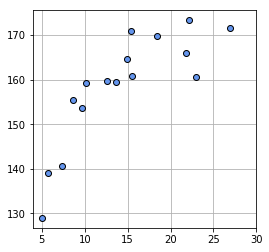

In [81]:
# 선형회귀 

np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170 ,108, 0.2]
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)
print(np.round(X, 2))
print(np.round(T, 2))

plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

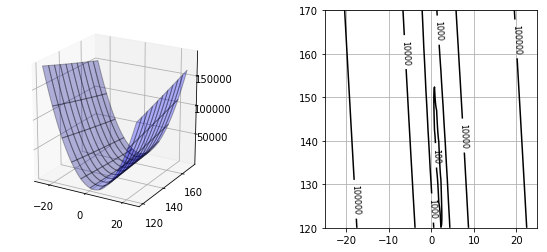

In [84]:
# w와 MSE와의 관계

from mpl_toolkits.mplot3d import Axes3D

def mse_line(x, t, w) :
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse

xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
MSE = np.zeros((len(x0), len(x1)))

for i0 in range(xn) :
    for i1 in range(xn) :
        MSE[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
        
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, MSE, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, MSE, 30, colors='black', levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()

In [86]:
# w0, w1의 기울기 구하기

def dmse_line(x, t, w) :
    y = w[0]* x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1

d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


In [91]:
# 경사하강법

def fit_line_num(x, t) :
    w_init = [10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # 학습률
    i_max = 100000 # 반복 최대수
    eps = 0.1 # 기울기 절대값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    
    for i in range(1, i_max) :
        dmse = dmse_line(x, t, w_i[i -1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        
        if max(np.absolute(dmse)) < eps : 
            break # 절대값보다 작아지면 종료 판정
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i

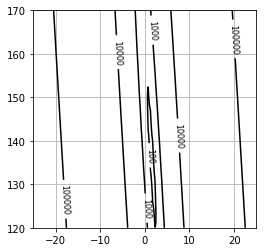

In [96]:
plt.figure(figsize=(4,4)) # MSE 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)

for i0 in range(xn) :
    for i1 in range(xn) :
        MSE[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

cont = plt.contour(xx0, xx1, MSE, 30, colors='black', levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()

반복 횟수 13820

W = [1.539947, 136.176160]

dMSE = [-0.005794, 0.099991]

MSE = 49.027452



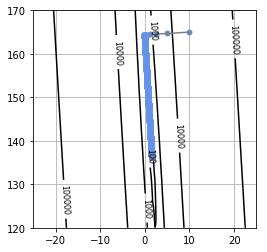

In [98]:
# w 갱신값 표시하여 재출력

plt.figure(figsize=(4,4)) # MSE 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)

for i0 in range(xn) :
    for i1 in range(xn) :
        MSE[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

cont = plt.contour(xx0, xx1, MSE, 30, colors='black', levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

# 경사 하강법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)

# 갱신값 포함하여 결과 보기
print("반복 횟수 {0}\n".format(W_history.shape[0]))
print("W = [{0:.6f}, {1:.6f}]\n".format(W0, W1))
print('dMSE = [{0:.6f}, {1:.6f}]\n'.format(dMSE[0], dMSE[1]))
print('MSE = {0:.6f}\n'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
        color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

w0 = 1.540, w1 = 136.176

SD = 7.002 cm



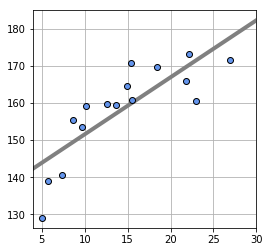

In [103]:
# w0, w1 직선식에 대입하기

# 선 표시하기
def show_line(w) :
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)
    
plt.figure(figsize=(4,4))
W = np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0 = {0:.3f}, w1 = {1:.3f}\n".format(W0, W1))
print("SD = {0:.3f} cm\n".format(np.sqrt(mse)))
show_line(W)

plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()